## 다중 회귀
Multiple Regression<br>
여러개의 변수를 사용하는 회귀<br>
multinomial<br><br>
특성이 한개이면 2차원 공간, 2개이면 3차원 공간에서 표현 가능
<br> 그 이상이라면..?<br><br>
새로운 특성을 추가하거나, 조합하는 것을 일반적으로 **특성 공학**이라고 한다.<br>머신러닝 알고리즘은 특성공학에 영향을 많이 받는 편이다.



--------------------------------------------------------

구글 colab을 이용하여 실습을 진행하였다.

파일을 업로드하여 불러오도록 하겠다.

In [1]:
#파일 업로드하기
from google.colab import files
myfile = files.upload()

Saving zucchini.csv to zucchini.csv


zucchini.csv(application/vnd.ms-excel) - 1104 bytes, last modified: 2021. 11. 14. - 100% done
Saving zucchini.csv to zucchini.csv
<br> 업로드 됨

In [2]:
#io와 pandas 모듈 import
import io
import pandas as pd

코랩에서는 io모듈을 import 하지 않은 상태에서 pandas를 사용할 경우 오류 발생한다.

In [4]:
#pd.read_csv로 csv파일 불러오기
df = pd.read_csv(io.BytesIO(myfile['zucchini.csv']))
zucchini_full = df.to_numpy()

코랩에 업로드하여 파일 읽어오기 완료

-------------------------------------

In [5]:
# 주피터 노트북에서 진행한다면
#import pandas as pd
#df = pd.read_csv('./zucchini.csv'))
#zucchini_full = df.to_numpy()

CSV 파일 -> 판다스 데이터 프레임 -> 넘파이 배열

In [8]:
print(zucchini_full[:5]) # 다섯개만...

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]


In [10]:
# 타겟 데이터 만들기
import numpy as np

zucchini_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [11]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(zucchini_full, zucchini_weight,random_state=42)

### 다항 특성 만들기

In [13]:
from sklearn.preprocessing import PolynomialFeatures
# 사이킷런 변환기

# degree 2
poly = PolynomialFeatures() # 객체 만들기
poly.fit([[2,3]]) # 훈련
# 1(bais), 2, 3, 2**2, 2*3, 3**2
print(poly.transform([[2,3]])) # 변환

[[1. 2. 3. 4. 6. 9.]]


2개의 특성을 가진 [2,3]dl 6개의 특성을 가진 [1. 2. 3. 4. 6. 9.]으로 변환됨.
<br><br>
훈련(fit)을 해야 변환(transform)을 할 수 있다. -> 이를 한번에 하는 fit_transform도 존재한다.<br>
fit이 뭘 학습하는건 아니다..일관성 유지를 위해 변환기 클래스들도 fit 매소드를 사용하는 것.

<br>[[**1**. 2. 3. 4. 6. 9.]] -> 1은 왜 생겼을까?<br>
y = a * x + b * 1<br>
[a,b] * [x,**1**]<br>
자동으로 절편을 위한 특성 1을 만들어준다.<br><br>
사이킷런 선형모델은 자동으로 절편을 추가하기때문에 굳이 특성 1이 필요 없다.<br>
절편을 위한 특성을 빼려면 include_bias=False으로 지정하면 된다.<br>
사이킷런 모델은 자동으로 특성에 추가된 절편항을 무시하지만, 혼돈을 피하기 위해 명시적으로 지정.


In [15]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape) # 크기 확인

(42, 9)


(42, 9)<br>
42개의 샘플, 9개의 특성이 있는 배열

In [19]:
# 각각 특성이 어떻게 만들어졌는가(길이, 높이, 두께)
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [20]:
# test 변환 - 훈련 set에 사용한 것을 무조건 test set에 사용한다.
test_poly = poly.transform(test_input)

훈련 set에 사용한 것을 무조건 test set에 사용한다.<br>
실수 방지를 위해 이런 습관을 기르자!

### 다중 회귀 모델 훈련하기

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9903183436982124
0.9714559911594132


특성을 9개나 넣었기때문에 훈련 세트에 잘 맞는 결과가 나왔다.(복잡한 모델이 만들어짐)

### 더 많은 특성 만들기

점수를 더 높여보고자 더 많은 특성을 어서 복잡한 모델을 만들어보자.

In [27]:
poly = PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


(42, 55)<br>
55개의 특성

In [28]:
lr.fit(train_poly, train_target)

print(lr.score(train_poly,train_target))

0.9999999999991096


거의 완벽한 점수가 나왔다.

In [29]:
print(lr.score(test_poly,test_target))

-144.40579242335605


R^2가 음수가 나옴...<br>
훈련세트의 점수와 테스트 세트의 점수가 너무 많이 차이나서 어마어마한 과대적합이 된 것.<br>
샘플이 42개인데 특성이 55개이므로..그럴 수 밖에...<br>극도로 과대적합 된 모델을 완화하는 기법 →  **규제**

### 규제(Regularization)
극도로 과대적합되지 않도록 완화<br>
선형모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 것<br>
가중치가 높으면 벌칙을 줘서 가중치를 낮춘다.
- 릿지 회귀
- 라쏘 회귀


<br>

#### 규제 전에 표준화

z점수, 표준점수

In [31]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
# 훈련 세트에서 사용한 변환기를 이용하여 test 세트까지 변환해야한다!
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
# 표준점수로 변환한 train_scaled, test_scaled

### 릿지 회귀

In [32]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615398


훈련 세트 점수는 조금 낮아졌지만, 많은 특성을 사용했음에도 테스트 세트 점수가 높아졌다.<br>
특성은 여전히 55개로 많지만, 릿지 클래스에 넣음으로 가중치가 커지는것(훈련세트에 너무 잘 맞는 것)을 막아 테스트 세트에도 맞도록 규제모델을 만들었다.<br><br>

**선형 회귀에 L2 규제를 하는 것이 릿지**<br>

L2, 즉 (가중치)^2을 규제로 삼는다. <br>
릿지는 모델 객체를 만들 때 alpha 매개변수로 규제 강도를 정한다.
<br> alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합이 되도록 유도한다. 
<br>
<br>규제 강도에 따라 다른 값이 나오며, 어느 값이 최적의 규제 강도인지는 바꿔보면서 확인해야한다.

<br>
하이퍼 파라미터 :  사람이 직접 지정해야하는 매개변수


In [33]:
# 적절한 alpha 값을 찾기 위해 alpha 값에 대한 R^2 그래프를 그린다.
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.01, 0.1, 1.0, 10, 100]

for alpha in alpha_list : 
  # 릿지 모델 만들기
  ridge = Ridge(alpha=alpha)
  # 릿지 모델 훈련
  ridge.fit(train_scaled,train_target)
  # 훈련점수, 테스트 점수를 리스트에 저장
  train_score.append(ridge.score(train_scaled,train_target))
  test_score.append(ridge.score(test_scaled, test_target))

In [35]:
print(train_score)
print(test_score)

[0.9917809981250537, 0.9903815817570366, 0.9896101671037343, 0.988728468997471, 0.9841843235774494]
[0.980018793687313, 0.9827976465386927, 0.9790693977615398, 0.9725329582461568, 0.9627042641050291]


alpha 값을 10의 배수로 놓았기 때문에 log scale으로 바꾼다.<br>
바꾸지 않는다면 0.01에서 0.1 사이는 가깝고 10과 100사이는 멀기 때문에 보기 힘들다.

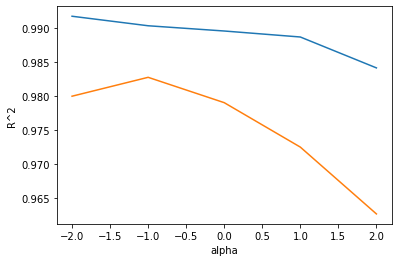

In [36]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

파란색 - 훈련세트 그래프<br>
주황색 - 테스트 세트 그래프<br>

<--과대적합   &nbsp; **0.1** &nbsp;   과소적합 -->
<br>
alpha 값이 0.1일 때 가장 점수가 적절히 나온다.

In [37]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386927


훈련 세트와 테스트 세트의 점수가 비슷하게 높고,<br> 과대적합과 과소적합 사이에 균형을 맞추고 있는 점수가 나왔다.

### 라쏘 회귀
**선형 회귀에 L1 규제를 하는 것이 라쏘**

L1, 즉 가중치의 절대값을 규제로 삼는다.

In [38]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target) # 표준점수로 바꾼 훈련 세트를 넣는다.

print(lasso.score(train_scaled, train_target))

0.9897898972080961


과대적합을 잘 억제한 결과를 보여준다.

In [43]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


테스트 점수도 릿지만큼 좋음.

In [45]:
# 적절한 alpha 값을 찾기 위해 alpha 값에 대한 R^2 그래프를 그린다.
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001,0.01, 0.1, 1.0, 10, 100]

for alpha in alpha_list : 
  # 릿지 모델 만들기
  lasso = Lasso(alpha=alpha,max_iter=10000)
  # 릿지 모델 훈련
  lasso.fit(train_scaled,train_target)
  # 훈련점수, 테스트 점수를 리스트에 저장
  train_score.append(lasso.score(train_scaled,train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


**ConvergenceWarning**이 발생할 수 도 있음<br>
라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정한 횟수가 부족할 때 이 경고 발생<br>
max_iter=10000을 지정해서 반복 횟수를 충분히 늘림. 필요하면 더 늘릴 수 있으나 이 문제에서는 별 영향을 끼치지 않음.

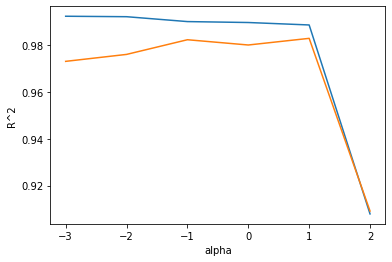

In [46]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

파란색 - 훈련세트 그래프<br>
주황색 - 테스트 세트 그래프<br>


alpha 값이 10일 때 가장 점수가 적절히 나온다.

In [47]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [48]:
# 라쏘 모델의 특징은 일부 특성을 아예 사용 안 할 수 있음
# 특성 * 가중치에서 가중치를 0으로 만들어서 사용 안하는 것
# 가중치가 0인것만 찾아서 개수 출력
print(np.sum(lasso.coef_ == 0))

40


55개의 특성 중 15개만 라쏘 모델에 사용하고 40개는 사용 안한 것<br>
일부 특성을 사용 안한 것이 나쁜것은 아니지만..

일반적으로 라쏘(L1 규제)보다는 릿지(L2 규제)를 선호한다.<br>
규제가 좀 더 잘 된다고 볼 수 있음